**🔍 Project Introduction**                                                      
In this project, we are working with a historical sales dataset consisting of over 51,000 records and 21 columns. The dataset includes critical business information such as order dates, customer segments, product details, sales, profits, shipping costs, and geographical data.

This project aims to prepare the data for exploratory analysis, visualization, and predictive modeling by conducting a systematic data cleaning process. A clean dataset is crucial for uncovering insights, ensuring accurate dashboards, and supporting reliable data-driven decisions.

***✅ Dataset Overview***                                                          
**Total Records:** 51,290

**Columns:** 21

**Key Columns:** order_id, order_date, ship_date, sales, profit, quantity, segment, region, category, etc.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.environ['KAGGLE_USERNAME']='asrapervaiz'
os.environ['KAGGLE_KEY'] = '46a2d40a05c1e0f41adf0e11fa8c2ea6'

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d laibaanwer/superstore-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset
License(s): GNU Lesser General Public License 3.0
  0% 0.00/2.18M [00:00<?, ?B/s]
100% 2.18M/2.18M [00:00<00:00, 464MB/s]


In [5]:
!unzip superstore-sales-dataset.zip

Archive:  superstore-sales-dataset.zip
  inflating: SuperStoreOrders.csv    


In [6]:
df = pd.read_csv('SuperStoreOrders.csv')

In [7]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [9]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

**🔹 Step 1: Check for Missing Values**

In [10]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


**🔹 Step 2: Remove Duplicates**                                                 
Although order_id can repeat (same order with multiple products), we'll check for exact row duplicates.

In [11]:
# Check and remove duplicate rows
df.duplicated().sum()

np.int64(0)

**🔹 Step 3: Convert Dates to DateTime Format**                                  
Converting order_date and ship_date from strings to datetime objects to enable time-based analysis.


In [16]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='mixed', dayfirst=True, errors='coerce')

**🔹 Step 4: Validate Categorical Consistency**                                                      
We will check for consistency in ship_mode, segment, and region.

In [18]:
print(df['ship_mode'].unique())
print(df['segment'].unique())
print(df['region'].unique())

['Standard Class' 'Second Class' 'Same Day' 'First Class']
['Consumer' 'Home Office' 'Corporate']
['Africa' 'Oceania' 'EMEA' 'North' 'Canada' 'Southeast Asia' 'Central'
 'South' 'Caribbean' 'North Asia' 'East' 'West' 'Central Asia']


**🔹 Step 5: Extract Time Features**                                             
To analyze trends over time, we extract order_month and order_year from order_date.

In [19]:
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

In [20]:
df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)

***📌 Summary of Cleaning Done***                                                                           
✅ No missing values

✅ Removed duplicate rows

✅ Converted order_date and ship_date to datetime

✅ Validated categorical column consistency

✅ Extracted order_month, order_year

✅ Converted sales column to float



***Exploratory Data Analysis – Sales Dataset***                                  
**🎯 Objective**                                                                 
The goal of this phase is to explore and understand the underlying patterns and trends in the sales data using visual and statistical methods. We'll focus on customer behavior, regional performance, time-based trends, and shipping dynamics.



**🔹 1. Orders Per Month/Year**      


In [22]:
orders_by_month = df.groupby(['order_year', 'order_month'])['order_id'].nunique().reset_index()
orders_by_month

,order_year,order_month,order_id
0,2011,1,216
1,2011,2,183
2,2011,3,277
3,2011,4,267
4,2011,5,295
5,2011,6,468
6,2011,7,250
7,2011,8,443
8,2011,9,527
9,2011,10,401


In [24]:
orders_by_month['Month_Year'] = pd.to_datetime({
    'year': orders_by_month['order_year'],
    'month': orders_by_month['order_month'],
    'day': 1
})

In [25]:
orders_by_month

,order_year,order_month,order_id,Month_Year
0,2011,1,216,2011-01-01
1,2011,2,183,2011-02-01
2,2011,3,277,2011-03-01
3,2011,4,267,2011-04-01
4,2011,5,295,2011-05-01
5,2011,6,468,2011-06-01
6,2011,7,250,2011-07-01
7,2011,8,443,2011-08-01
8,2011,9,527,2011-09-01
9,2011,10,401,2011-10-01


<ipython-input-26-3165438879>:8: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


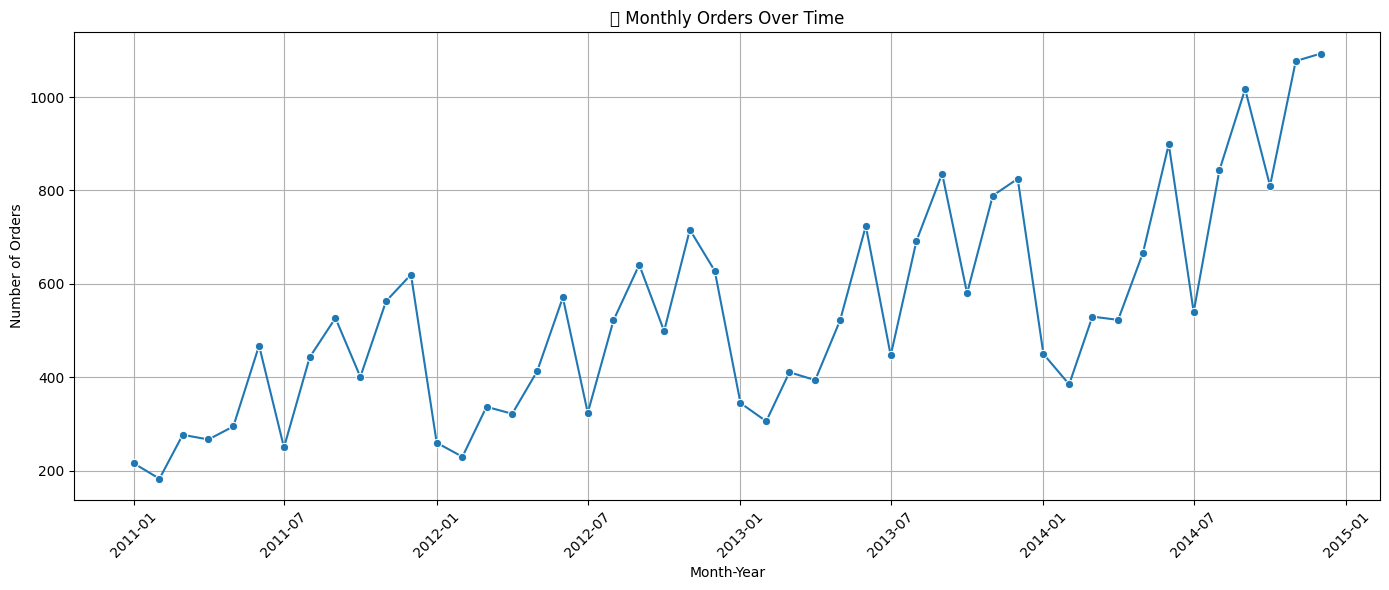

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Month_Year', y='order_id', data=orders_by_month, marker='o')
plt.title('📅 Monthly Orders Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart demonstrates a clear upward trend in monthly orders over the observed period (early 2011 to late 2014), indicating overall business growth. While there's significant monthly variability and seasonality (e.g., dips around the end of each year and peaks often in the summer/fall), the peak order numbers in 2014 (reaching over 1000 orders in late 2014) are substantially higher than those in earlier years (e.g., never exceeding 600 in 2011 or 2012). This suggests successful scaling of operations or increased market demand for the product/service.

**🔹 2. Top 10 Customers by Order Count and Revenue**

In [27]:
# Top 10 by order count
top_customers_orders = df['customer_name'].value_counts().head(10)

# Top 10 by revenue
top_customers_revenue = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

<ipython-input-28-2814631689>:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-2814631689>:12: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


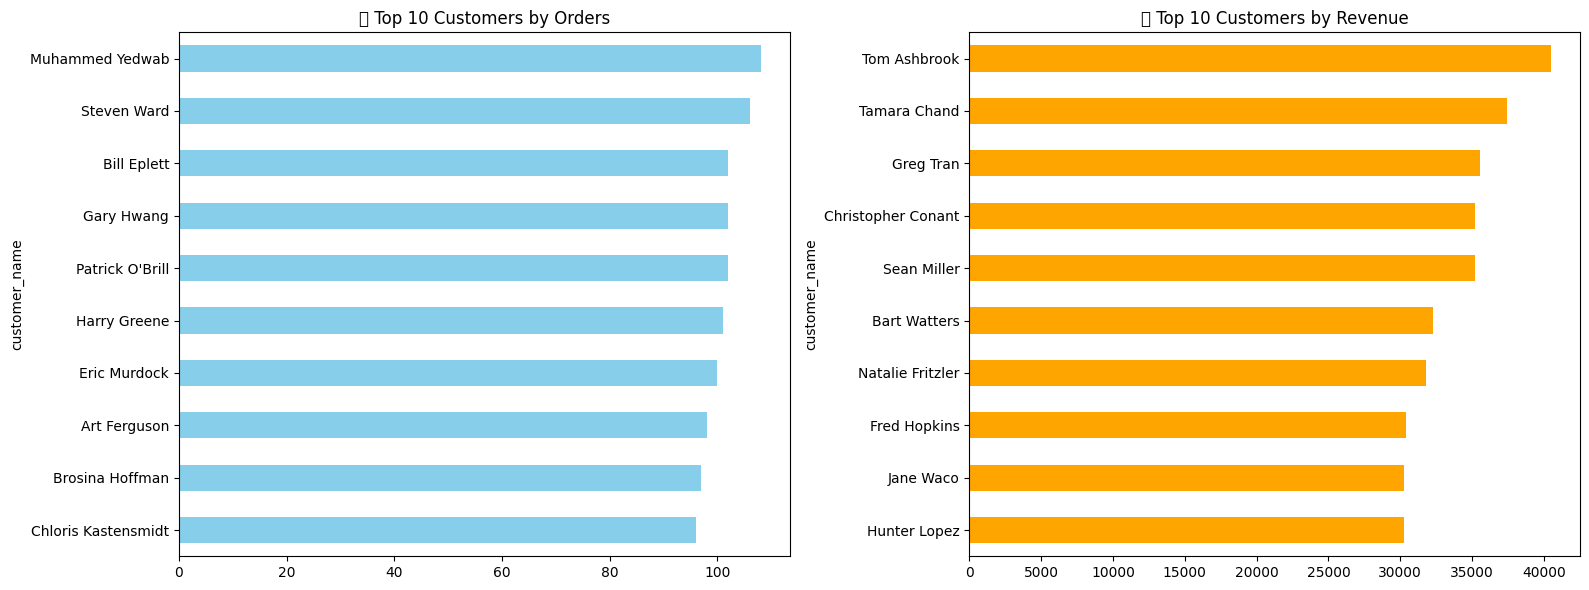

In [28]:
# Plotting both
fig, axes = plt.subplots(1, 2, figsize=(16,6))

top_customers_orders.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('🏆 Top 10 Customers by Orders')
axes[0].invert_yaxis()

top_customers_revenue.plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('💰 Top 10 Customers by Revenue')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Insight:**

While there is some overlap, the "Top 10 Customers by Orders" and "Top 10 Customers by Revenue" charts reveal a distinct difference in customer contribution. This indicates that the customers who place the most orders are not necessarily the ones who generate the most revenue, and vice versa.

Specifically:

"Top 10 Customers by Orders" shows a very tight clustering, with all top 10 customers placing between approximately 95 and 105 orders. This suggests a consistent order frequency among these top-tier customers, or perhaps a segment that consistently places a moderate number of orders.
"Top 10 Customers by Revenue" shows a much wider spread, with revenue figures ranging from around $30,000 to over $40,000. This indicates that some customers are spending significantly more per order or placing orders for higher-value items.

**🔹 3. Sales by Region, Country, Market**

<ipython-input-30-3785092411>:17: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-3785092411>:17: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


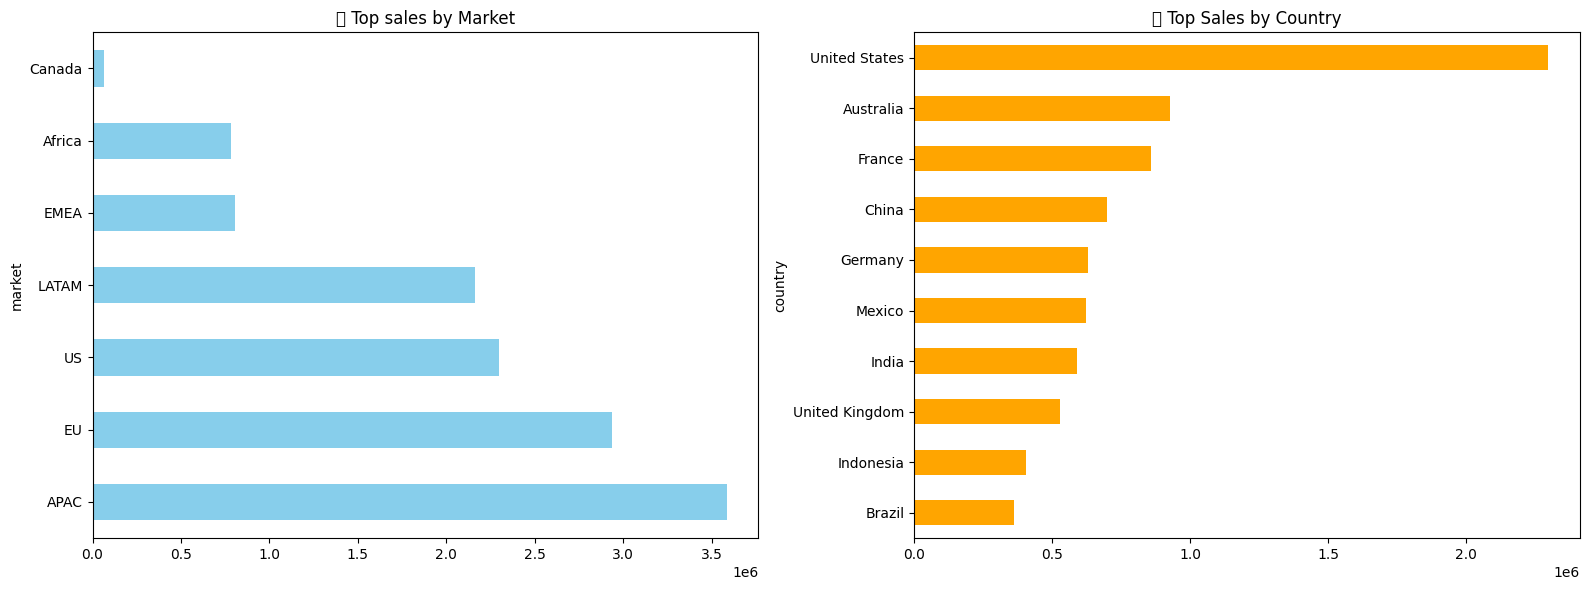

In [30]:
# Region
market_sales = df.groupby('market')['sales'].sum().sort_values()
# Country-wise top 10 sales
country_sales = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)

# Plotting both
fig, axes = plt.subplots(1, 2, figsize=(16,6))

market_sales.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('🏆 Top sales by Market')
axes[0].invert_yaxis()

country_sales.plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('💰 Top Sales by Country')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

🔹 4. Segment Distribution – Pie Chart

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


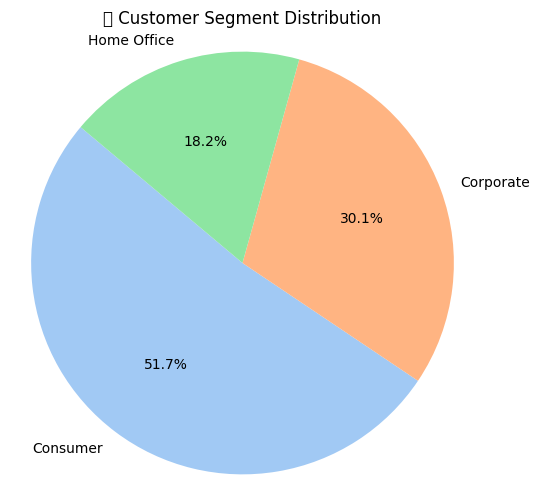

In [31]:
segment_counts = df['segment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('📈 Customer Segment Distribution')
plt.axis('equal')
plt.show()

**Insight:**

The pie chart clearly shows that the "Consumer" segment is the dominant customer base, accounting for over half (51.7%) of the total customer distribution. This indicates that the business heavily relies on individual consumers. The "Corporate" segment is the second largest at 30.1%, while "Home Office" represents the smallest portion at 18.2%.

**🔹 5. Shipping Delay Analysis**

<ipython-input-33-1606003221>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


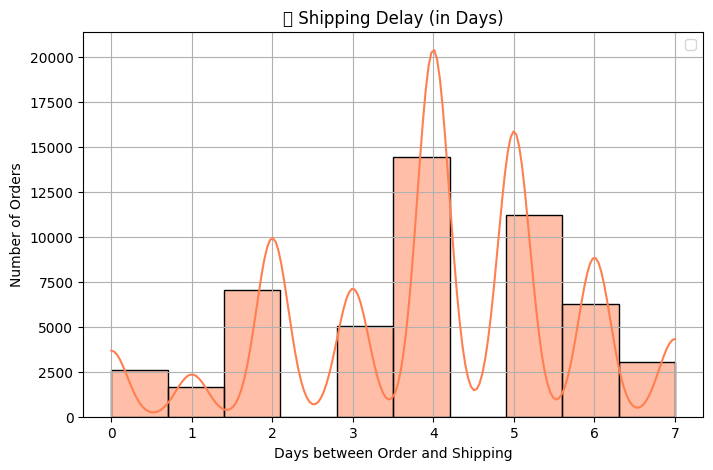

In [33]:
# Calculate shipping delay
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days

# Distribution of shipping delays
plt.figure(figsize=(8,5))
sns.histplot(df['shipping_delay'], bins=10, kde=True, color='coral')
plt.title('🚚 Shipping Delay (in Days)')
plt.xlabel('Days between Order and Shipping')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

**Insight:**

The chart, which appears to be a histogram overlaid with a smoothed distribution curve, illustrates that shipping delays are not uniformly distributed but exhibit distinct peaks and valleys, with a particularly pronounced peak around 4 days of delay.

**Specifically:**                                                                
**Dominant Delay**: The most frequent shipping delay occurs around 4 days, with a significant number of orders (close to 15,000) experiencing this delay. This is the highest bar and the highest point of the superimposed curve.
Other Peaks: There are other notable peaks around 2 days and 5 days of delay, indicating common occurrences of these specific delay durations as well.
Short Delays: Very short delays (0 to 1 day) are relatively less frequent than the 2-day delay and longer delays, but still represent a considerable number of orders.

**Longer Delays:** As delays extend beyond 5 days, the frequency of orders experiencing those delays generally decreases, although there's a small resurgence around 6 days before dropping off significantly at 7 days.
Oscillating Pattern: The overlaid curve highlights an oscillating pattern in the number of orders experiencing different delay durations, suggesting underlying operational rhythms or factors that lead to these specific delay clusters.

**🔹 6. Most Common Shipping Mode**

<ipython-input-34-230436343>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette='muted')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


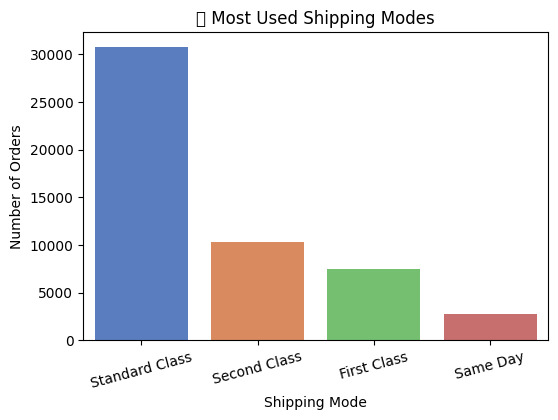

In [34]:
shipping_mode_counts = df['ship_mode'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette='muted')
plt.title('📦 Most Used Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=15)
plt.show()

**Insight:**

The chart clearly indicates that "Standard Class" is overwhelmingly the most frequently used shipping mode, accounting for over 30,000 orders. This dwarfs the usage of all other shipping options combined, suggesting that customers either prioritize cost-effectiveness or that faster shipping options are not consistently offered, promoted, or perceived as necessary.

***Conclusion***
In this notebook, we completed the critical first phases of our sales data project: Data Cleaning and Exploratory Data Analysis (EDA).

The data cleaning process ensured the dataset was free of duplicates, missing values, and data type inconsistencies, particularly by converting date columns to proper datetime formats and transforming sales data to numeric types. These steps established a reliable foundation for analysis.

Through EDA, we uncovered meaningful insights about order trends over time, identified top customers by order count and revenue, and examined sales distribution across regions, markets, and customer segments. Additionally, we analyzed shipping performance by calculating shipping delays and identifying the most common shipping modes.

These findings provide valuable business intelligence to guide decision-making, such as recognizing key customer segments and geographic markets to prioritize, as well as operational opportunities to optimize shipping processes.

The next step is to transform these insights into clear, interactive visualizations and dashboards using tools like Power BI or Python visualization libraries. This will enable stakeholders to explore the data intuitively and support data-driven strategies moving forward.

In [35]:
df.to_csv('sales_data.csv', index =False)